In [1]:
import pandas as pd
import numpy as np

file_path = 'UM_datathon_2024_cleaned.csv'
data = pd.read_csv(file_path)

data['time'] = pd.to_datetime(data['time'])
data = data.sort_values('time')

# Moving Averages
data['SMA_10'] = data['close_price'].rolling(window=10).mean()
data['SMA_50'] = data['close_price'].rolling(window=50).mean()

# RSI
delta = data['close_price'].diff(1)
gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)

avg_gain = pd.Series(gain).rolling(window=14).mean()
avg_loss = pd.Series(loss).rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Bollinger Bands
data['BB_Middle'] = data['close_price'].rolling(window=20).mean()
data['BB_Upper'] = data['BB_Middle'] + 2 * data['close_price'].rolling(window=20).std()
data['BB_Lower'] = data['BB_Middle'] - 2 * data['close_price'].rolling(window=20).std()

# Generate Entry/Exit Signals
data['Signal'] = 0  # 0 = Hold, 1 = Buy, -1 = Sell

# Moving Average Crossover
data.loc[data['SMA_10'] > data['SMA_50'], 'Signal'] = 1  # Buy
data.loc[data['SMA_10'] < data['SMA_50'], 'Signal'] = -1  # Sell

# RSI Overbought/Oversold
data.loc[data['RSI'] < 30, 'Signal'] = 1  # Buy
data.loc[data['RSI'] > 70, 'Signal'] = -1  # Sell

# Bollinger Band Signal
data.loc[data['close_price'] < data['BB_Lower'], 'Signal'] = 1  # Buy
data.loc[data['close_price'] > data['BB_Upper'], 'Signal'] = -1  # Sell

# Save the processed data
output_path = 'UM_datathon_2024_with_indicators.csv'
data.to_csv(output_path, index=False)

# Display the result
data[['time', 'close_price', 'SMA_10', 'SMA_50', 'RSI', 'BB_Upper', 'BB_Lower', 'Signal']].head()


,time,close_price,SMA_10,SMA_50,RSI,BB_Upper,BB_Lower,Signal
0,2020-03-25 10:00:00,6591.5,NaN,NaN,NaN,NaN,NaN,0
1,2020-03-25 11:00:00,6511.5,NaN,NaN,NaN,NaN,NaN,0
2,2020-03-25 12:00:00,6583.5,NaN,NaN,NaN,NaN,NaN,0
3,2020-03-25 13:00:00,6585.0,NaN,NaN,NaN,NaN,NaN,0
4,2020-03-25 14:00:00,6590.0,NaN,NaN,NaN,NaN,NaN,0


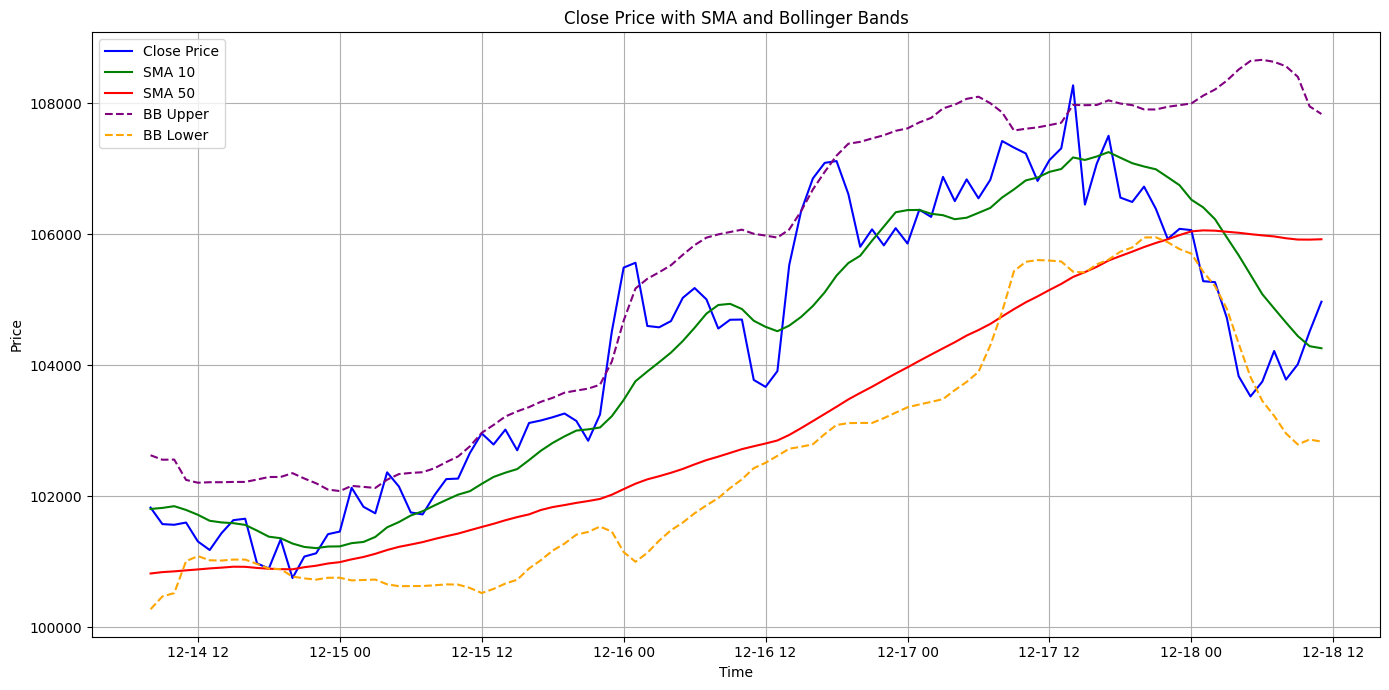

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

data_with_indicators = pd.read_csv('UM_datathon_2024_with_indicators.csv')

data_with_indicators['time'] = pd.to_datetime(data_with_indicators['time'])

data_viz = data_with_indicators.tail(100)

plt.figure(figsize=(14, 7))
plt.plot(data_viz['time'], data_viz['close_price'], label='Close Price', color='blue')
plt.plot(data_viz['time'], data_viz['SMA_10'], label='SMA 10', color='green')
plt.plot(data_viz['time'], data_viz['SMA_50'], label='SMA 50', color='red')
plt.plot(data_viz['time'], data_viz['BB_Upper'], label='BB Upper', linestyle='--', color='purple')
plt.plot(data_viz['time'], data_viz['BB_Lower'], label='BB Lower', linestyle='--', color='orange')

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Close Price with SMA and Bollinger Bands')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
